# Netflix EDA Project
Goal:
To explore trends in The Netflix content using exploratory data analysis (EDA), identifying dominant genres, content types, release patterns, and other key insights.

## 1. Import Libraries and Load Data
Importing essential libraries and loading the Netflix dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [55]:
df = pd.read_csv('netflix_titles.csv')

In [56]:
df.shape

(8807, 12)

## 2. Data Cleaning
Checked for null values and filled or handled missing data accordingly.
For example, missing director names were filled as "Unknown".

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [52]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,main_genre,year_added
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [53]:
df.dropna(subset=['date_added', 'rating', 'duration'], inplace= True)

df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [54]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
main_genre      0
year_added      0
dtype: int64

## 3. Exploratory Data Analysis

### 3.1 Movies vs TV Shows

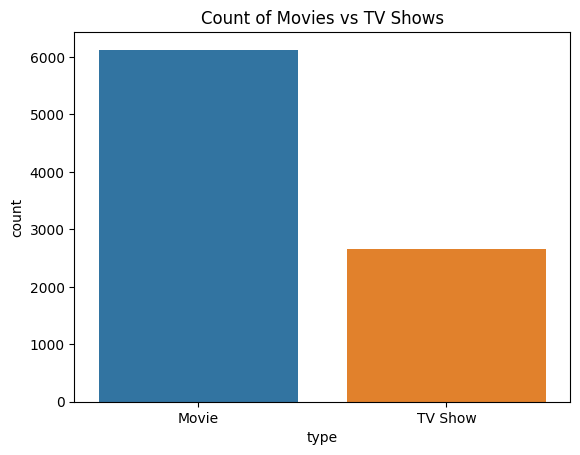

In [18]:
sns.countplot(data = df , x = 'type' ,hue='type')
plt.title('Count of Movies vs TV Shows')
plt.show()

<i>From the above graph we can see most of the content on Netflix is movies, with TV shows being a smaller portion.</i>

### 3.2 Content Added Over the Years

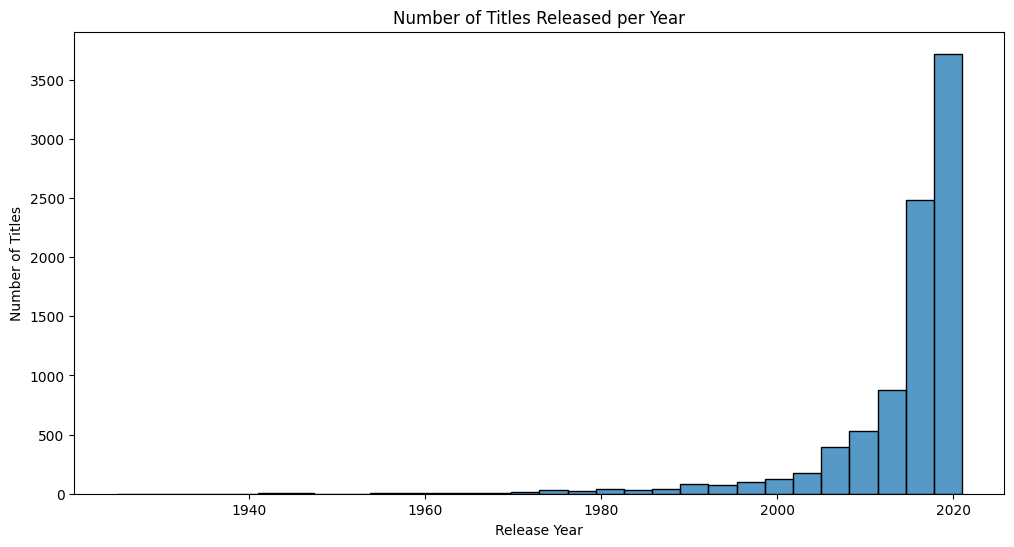

In [30]:
# Release year trend
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'],bins= 30)
plt.title('Number of Titles Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

<i>From the above graph we see that Netflix saw a peak in new content around 2019–2020, showing rapid growth in those years.</i>

In [32]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### 3.3 Genre Analysis

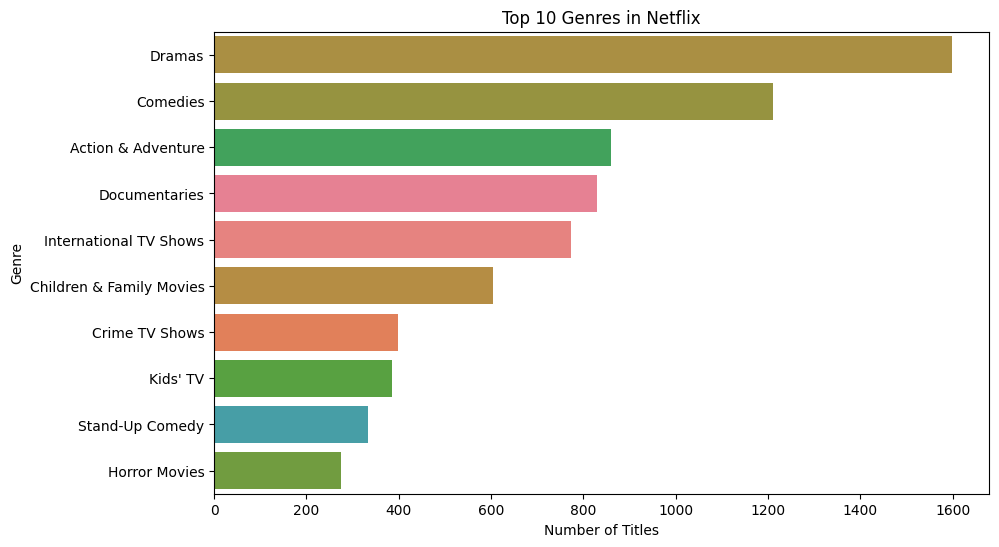

In [34]:
# The common genres
df['main_genre'] = df['listed_in'].str.split(',').str[0]

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='main_genre', order=df['main_genre'].value_counts().head(10).index, hue='main_genre')
plt.title('Top 10 Genres in Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

<i>From the above graph we see that Drama and Comedy are the most dominant genres.</i>

### 3.4 Country Distribution

C:\Users\JIT\AppData\Local\Temp\ipykernel_3960\618040842.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


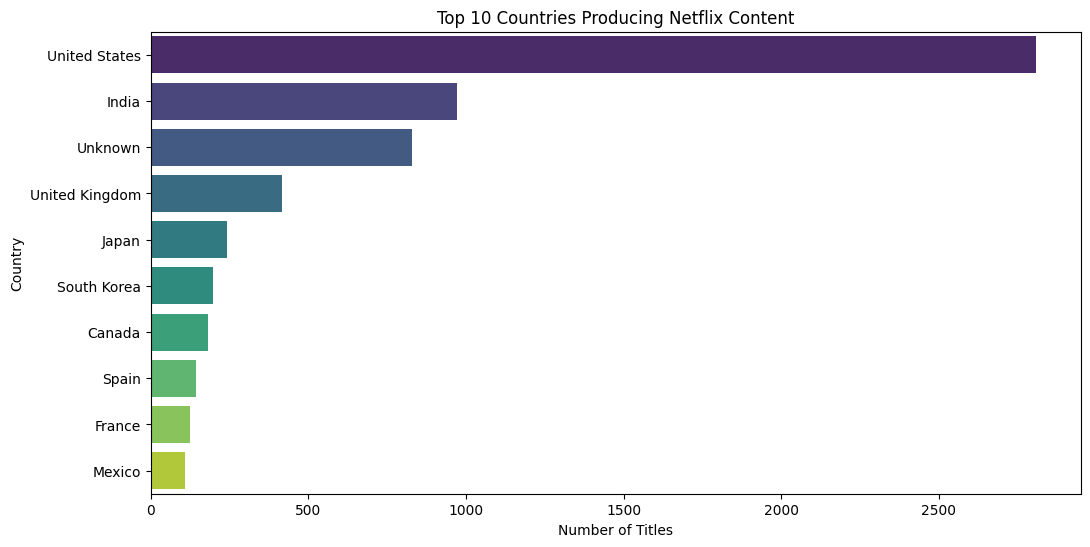

In [40]:
# Top countries producing Netflix content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


<i>USA leads in content production, followed by India.</i>

### 3.5 Ratings Distribution

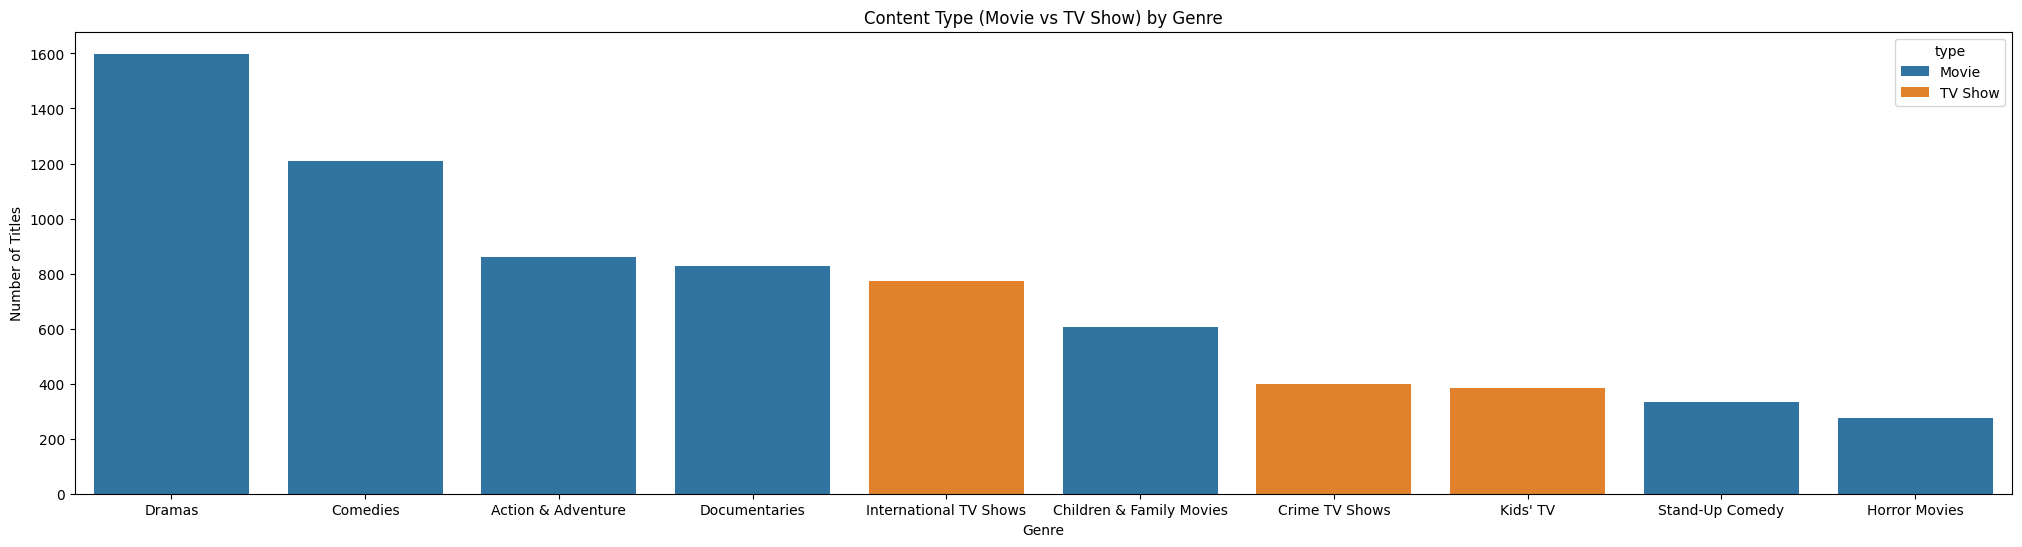

In [45]:
plt.figure(figsize=(25, 6))
sns.countplot(data=df, x='main_genre', hue='type', order=df['main_genre'].value_counts().head(10).index)
plt.title('Content Type (Movie vs TV Show) by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.show()


<i>Most content is rated TV-MA and TV-14, indicating a focus on mature audiences.</i>

### 3.6 Content Added Over the Years

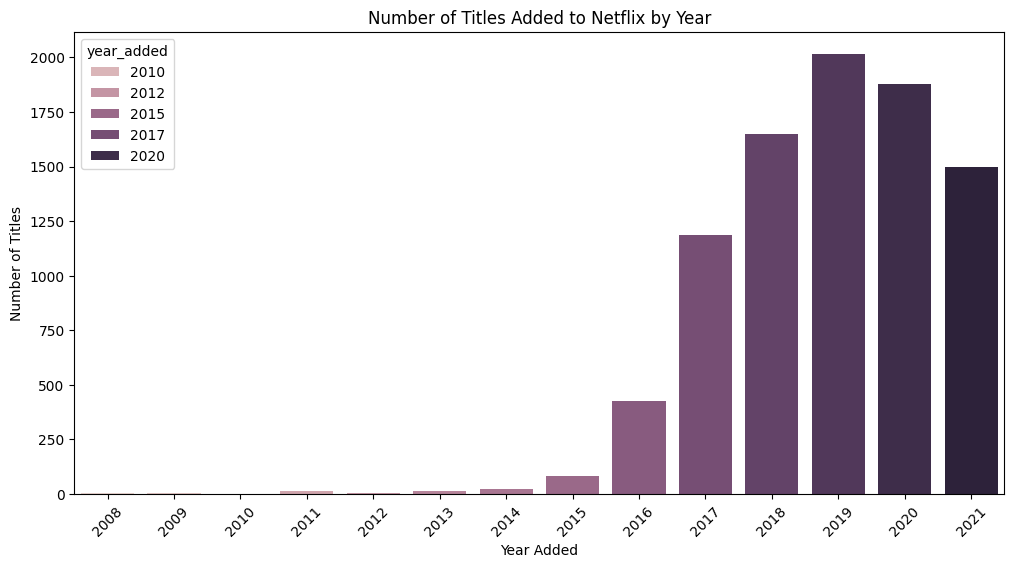

In [48]:
# Converting 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Extracting year from date_added
df['year_added'] = df['date_added'].dt.year

# Plot number of titles added per year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year_added', hue='year_added')
plt.title('Number of Titles Added to Netflix by Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


<i>Netflix saw a significant increase in new content starting from 2016, with a peak in 2019.
This indicates a growing investment in expanding its content library before 2020.</i>

### 3.7 Ratings Distribution

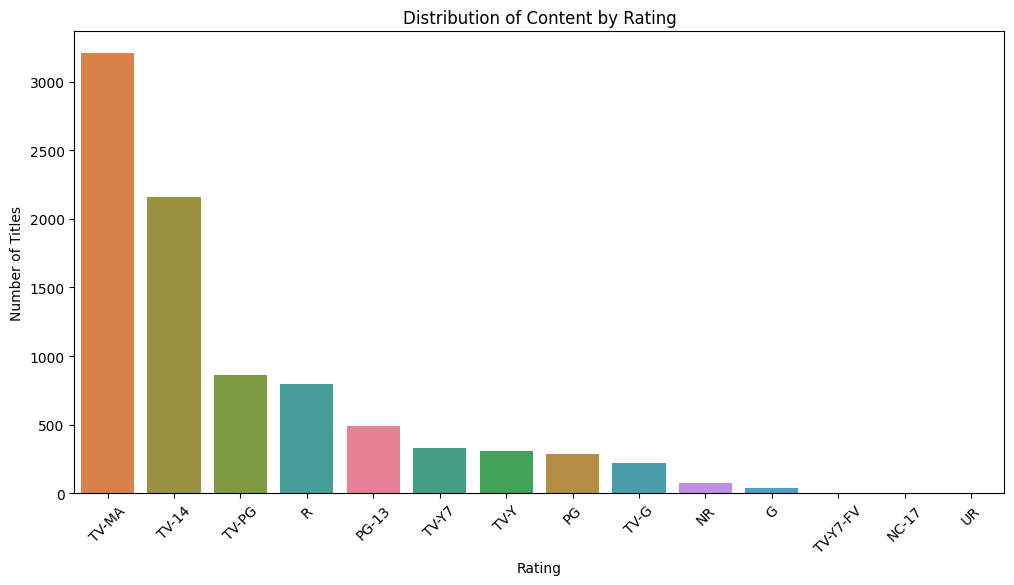

In [50]:
#which is the targeted audience
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, hue='rating')
plt.title('Distribution of Content by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


<i>Most content is rated TV-MA and TV-14, indicating a focus on mature audiences.</i>

### 3.8 Most Frequent Directors

In [51]:
# Top 10 most common directors
top_directors = df['director'].value_counts().head(10)
print(top_directors)


director
Unknown                   2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: count, dtype: int64


<i>Rajiv Chilaka appears the most among listed directors.</i>

## 4. Conclusion

Movies dominate over TV Shows.

Drama and Comedy are the most frequent genres.

United States and India are the top content producers.

2019 and 2020 saw a significant rise in new titles.

Majority of content is rated TV-MA and TV-14.

Many entries have unknown directors, but Rajiv Chilaka is the most listed among known ones.